In [1]:
import soundfile as sf
data1,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_2.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )
data2,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_3.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )

In [2]:
# from scipy import signal
# corr1 = signal.correlate(data1[:,0],data1[:,0],method='fft')/len(data1[:,0])

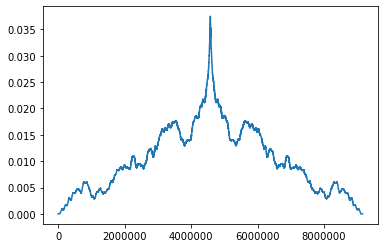

In [5]:
# corr2 = signal.correlate(data1[:,0],data1[:,1],method='fft')/len(data1[:,0])
# import matplotlib.pyplot as plt
# plt.plot(corr1)
# plt.show()

In [6]:
# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2

# PHAT Transfrorm 
def phatTransform(sig1, sig2, windowDuration, Fs, ):
    # Fs: Sampling Frequency
    # WindowDuration: the length of moving window in time (s)
    l = windowDuration * Fs
    N = len(sig1)
    # Padding
    if N%l != 0:
        padWidth = l-N%l
        sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
        sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    numOfWindows = len(sig1)/l
    for i in range(0,numOfWindows):
        sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
        Fsig1 = np.fft.fft(sig1Temp)
        Fsig2 = np.fft.fft(sig2Temp)
        # Normalize magnitude to 1
        phat1 = np.exp(1j*np.angle(Fsig1))
        phat2 = np.exp(1j*np.angle(Fsig2))
        # Element wise multiplication
        product = np.multiply(phat1, phat2)
        # Inverse fourier transform
        IFFT = np.abs(np.fft.ifft(product))
        # Statistics
        maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
        significance = (maxValue - mean) / std
        normalized = (IFFT-mean)/std
    

In [41]:
import numpy as np
from scipy import signal

# Truncate signal, based on the signal that has the shorter length
def truncate(sig1, sig2):
    l1, l2 = len(sig1), len(sig2)
    if l1 <= l2:
        return sig1, sig2[0:l1]
    else:
        return sig1[0:l2], sig2
    
sig1, sig2 = truncate(data1[:,0], data1[:,0])

windowDuration, Fs = 1, 16000
# The number of samples in each window
l = windowDuration * Fs
N = len(sig1)
# Padding
if N%l != 0:
    padWidth = l-N%l
    sig1 = np.pad(sig1, (0, padWidth), 'constant', constant_values = 0)
    sig2 = np.pad(sig2, (0, padWidth), 'constant', constant_values = 0)
    
numOfWindows = len(sig1)/l
for i in range(100,101):
    sig1Temp, sig2Temp = sig1[i*l:l*(i+1)], sig2[i*l:l*(i+1)]
    [f,crossSpectrum] = signal.csd(sig1Temp, sig2Temp, 
                                   nperseg=l,                   
                                   fs=16000.0, 
                                   window='hamming',
                                   return_onesided=False, 
                                   scaling='spectrum')
    weight = 1/np.abs(crossSpectrum)
    Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))
    
    
    
#     Fsig1 = np.fft.fft(sig1Temp)
#     Fsig2 = np.fft.fft(sig2Temp)
    
#     phat1 = np.exp(1j*np.angle(Fsig1))
#     phat2 = np.exp(1j*np.angle(Fsig2))
    
    
#     product = np.multiply(phat1, np.conj(phat2))
#     result = np.abs(signal.correlate(phat1,phat2))
#     IFFT = np.abs(np.fft.ifft(result))
    
# maxValue, argmax, mean, std = max(IFFT), np.argmax(IFFT), np.mean(IFFT), np.std(IFFT)
# significance = (maxValue - mean) / std
# normalized = (IFFT-mean)/std    

<ipython-input-41-2ccd60b5220c>:33: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1/np.abs(crossSpectrum)
<ipython-input-41-2ccd60b5220c>:34: RuntimeWarning: invalid value encountered in multiply
  Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))


In [36]:
len(Rxy)

16000

In [58]:
sig1Temp = (10**(-1))*np.ones(16000)
[f,crossSpectrum] = signal.csd(sig1Temp, sig1Temp, 
                               nperseg=l,                   
                               fs=16000.0, 
                               window='hamming',
                               return_onesided=False, 
                               scaling='spectrum')
weight = 1/np.abs(crossSpectrum)
Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))

<ipython-input-58-107e1d93a4f7>:8: RuntimeWarning: divide by zero encountered in true_divide
  weight = 1/np.abs(crossSpectrum)
<ipython-input-58-107e1d93a4f7>:9: RuntimeWarning: invalid value encountered in multiply
  Rxy = np.fft.ifft(np.multiply(weight,crossSpectrum))


In [62]:
np.argmin(crossSpectrum)

2000

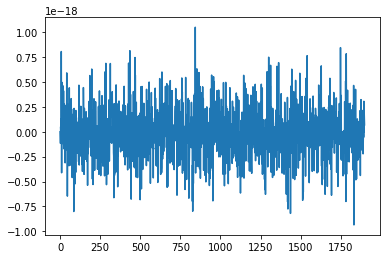

In [39]:
import matplotlib.pyplot as plt
plt.plot(Rxy[100:2000])